In [ ]:
# Imports
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath('../src'))

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from models import MultiClassAdaline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#  Chargement Wine
data = load_wine()
X = data.data  # On utilise toutes les 13 features ici !
y = data.target

print(f"Dataset Wine : {X.shape[0]} exemples, {X.shape[1]} features.")

# Split et Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Dataset Wine : 178 exemples, 13 features.


In [ ]:
#  Entraînement
# Note : Avec 13 features, il faut parfois baisser le learning rate (eta)
ada_wine = MultiClassAdaline(eta=0.0001, n_iter=1000, random_state=1)
ada_wine.fit(X_train_std, y_train)

Wine - Accuracy Train: 99.19%
Wine - Accuracy Test: 98.15%


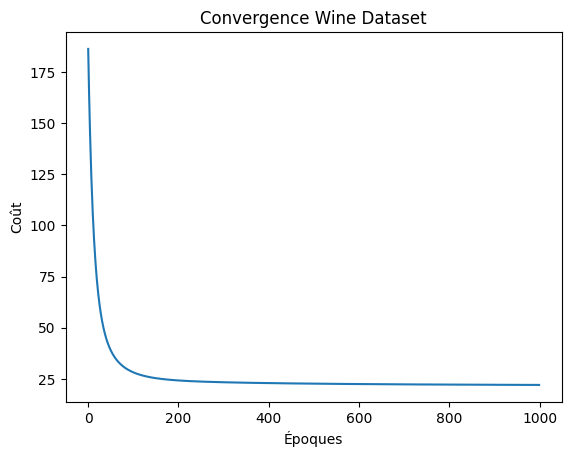

In [ ]:
#  Résultats
train_acc = accuracy_score(y_train, ada_wine.predict(X_train_std))
test_acc = accuracy_score(y_test, ada_wine.predict(X_test_std))

print(f"Wine - Accuracy Train: {train_acc*100:.2f}%")
print(f"Wine - Accuracy Test: {test_acc*100:.2f}%")

# Plot cost
plt.plot(ada_wine.cost_)
plt.title("Convergence Wine Dataset")
plt.xlabel("Époques")
plt.ylabel("Coût")
plt.show()